In [3]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)
pd.set_option("display.max_rows", None)

# Show dev Predictions Stats from the Best Model

The `dev_predictions.tsv` file is found in the `best_model` directory and has the following format:

        text    labels  predicted_labels        loss    probabilities   label   predicted_label
0        eso ! en no escuchar el despertador ! y te dormís nervioso ...con miedo...y peor es cuando te acostumbraste a dormir tarde     2       2       0.05242778      [0.00769282 0.04338438 0.9489229 ]      N       N

In [4]:
base_dir="/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/"
dir_src=os.path.join(base_dir, "best_model", "dev_predictions.tsv")

preds_df = pd.read_csv(dir_src, sep="\t")
preds_df.head()

,Unnamed: 0,text,labels,predicted_labels,loss,probabilities,label,predicted_label
0,0,eso ! en no escuchar el despertador ! y te dormís nervioso ...con miedo...y peor es cuando te acostumbraste a dormir tarde,2,2,0.052428,[0.00769282 0.04338438 0.9489229 ],N,N
1,1,"No Dennis, no puedes cometer los mismo errores, es hora de cambiar y cometer nuevos errores",1,1,0.324367,[0.11679611 0.7229848 0.16021916],NEU,NEU
2,2,"En Castalla (Alicante) muy oportunamente, a primeros de mes celebran sus fiestas de Moros i Cristians i todos están de fiesta!",0,0,0.513663,[0.5982998 0.35575208 0.04594814],P,P
3,3,"Me gusta tanto el modo nocturno de Twitter, que paso entrando a cada rato y ni se qué escribir... hasta ahorita",0,2,2.420515,[0.08887583 0.4016254 0.5094988 ],P,N
4,4,"ay noooo una vez más sin mí, todo el corazón roto",2,2,0.275371,[0.03697121 0.2037384 0.75929034],N,N


## Basic stats on the examples read

In [5]:
print(f"""
Total examples: {preds_df.count()[0]}
Correctly classified: {preds_df.query('label == predicted_label').count()[0]}
Misclassified: {preds_df.query('label != predicted_label').count()[0]}
""")


Total examples: 723
Correctly classified: 500
Misclassified: 223



## Check Misclassified Examples by Loss

In [6]:
preds_df.query('label != predicted_label').sort_values(by="loss", ascending=False).head(10)

,Unnamed: 0,text,labels,predicted_labels,loss,probabilities,label,predicted_label
138,138,"nah! Yo estoy lleno de tattos y me arranco pellejitos, aprendí como razcarme y la verdad no les ha pasado nada",0,2,4.544624,[0.01062417 0.06665421 0.9227216 ],P,N
160,160,hoy es mi último día de vacaciones y lo más emocionante de mi día ha sido hacer el puzzle de sunggyu,2,0,4.322790,[0.9405242 0.04621293 0.01326283],N,P
667,667,"y con ""las conozco"", me refiero a Maria y Krisbell . Mandale mis saluditos, somos ingratas todas",2,0,4.159556,[0.89413184 0.09025366 0.01561449],N,P
66,66,Tarde con mi peque #Broh,0,2,4.065654,[0.01715177 0.11934978 0.8634985 ],P,N
487,487,"ñery siempre fuiste uno de los uno , solo que vos no tenias la confianza para darte cuenta",0,2,3.942553,[0.01939862 0.10954473 0.8710566 ],P,N
412,412,"Si mañana no entra metales, voy a sentir muy mal a la profe hasta que diga que va a revisar suave y sí pasaría, la profe es toda cosi",0,2,3.938938,[0.01946887 0.18207178 0.7984594 ],P,N
520,520,De vdd tengo mucho sueño! Ya estoy viejito,2,0,3.930142,[0.8484854 0.13187367 0.01964087],N,P
652,652,ya haz algo bueno,2,0,3.928565,[0.83111465 0.14921346 0.01967187],N,P
217,217,Caminar no sólo es bueno para la salud Sino tmb para el bolsillo,0,2,3.671174,[0.02544659 0.1497996 0.8247538 ],P,N
675,675,TODOS SIEMPRE tienen carita de super buenos y adorables pero luego la lían,2,0,3.595197,[0.65435255 0.31819215 0.02745527],N,P


# Show Plots of Training vs Dev Losses

The `trainer_state.json` file is produced by the Huggingface Trainer class and has the following format:


``` json
{
  "best_metric": 0.7131866180133611,
  "best_model_checkpoint": "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-1400",
  "epoch": 1.9337016574585635,
  "global_step": 1400,
  "is_hyper_param_search": false,
  "is_local_process_zero": true,
  "is_world_process_zero": true,
  "log_history": [
    {
      "epoch": 0.14,
      "learning_rate": 4.6546961325966854e-05,
      "loss": 0.9898,
      "step": 100
    },
    {
      "epoch": 0.14,
      "eval_accuracy": 0.6154910096818811,
      "eval_f1": 0.5997847719989735,
      "eval_loss": 0.8309209942817688,
      "eval_precision": 0.6320426904939191,
      "eval_recall": 0.604016572418602,
      "eval_runtime": 14.8087,
      "eval_samples_per_second": 48.823,
      "eval_steps_per_second": 1.553,
      "step": 100
    },
    {
      "epoch": 0.28,
      "learning_rate": 4.3093922651933705e-05,
      "loss": 0.8745,
      "step": 200
    },
    {
      "epoch": 0.28,
      "eval_accuracy": 0.669432918395574,
      "eval_f1": 0.6720432053287148,
      "eval_loss": 0.7644963264465332,
      "eval_precision": 0.6772234272169421,
      "eval_recall": 0.6730359620904899,
      "eval_runtime": 14.3703,
      "eval_samples_per_second": 50.312,
      "eval_steps_per_second": 1.601,
      "step": 200
    },
...
```

In [7]:
trainer_output_files = [
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_4-lr_5e-5-msl_72-bs_8/checkpoint-2172/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-mldoc-finetuned-with-spanish-tweets-clf/ep_4-lr_5e-5-msl_72-bs_8-ds_config_60-20-20-nl_6-do_0.1/checkpoint-2100/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_6-do_0.1/checkpoint-1300/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-mldoc-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_6-do_0.1/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-mldoc-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-mldoc-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-mldoc-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.1/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_6-do_0.2/checkpoint-700/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_6-do_0.3/checkpoint-800/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_6-do_0.4/checkpoint-1000/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.1/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_3-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.1/checkpoint-1200/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_4-do_0.1/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_3-do_0.1/checkpoint-800/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-1000/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.3/checkpoint-1200/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.4/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_6-do_0.2/checkpoint-800/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_6-do_0.1/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.1/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.3/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_3-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-2100/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_3-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.3/checkpoint-2100/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2_2/checkpoint-1400/trainer_state.json",
    "/Users/fperez/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2_4/checkpoint-1400/trainer_state.json"]

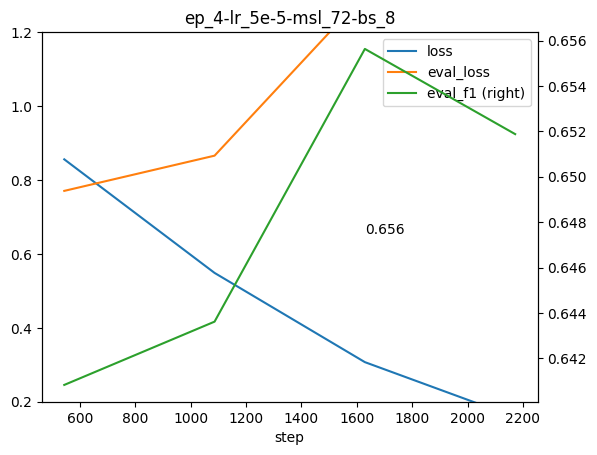

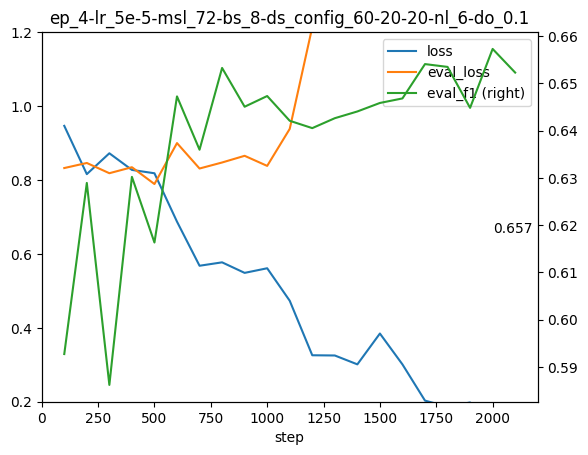

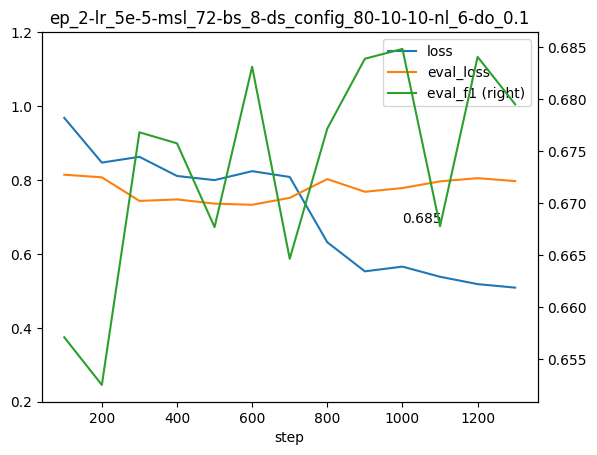

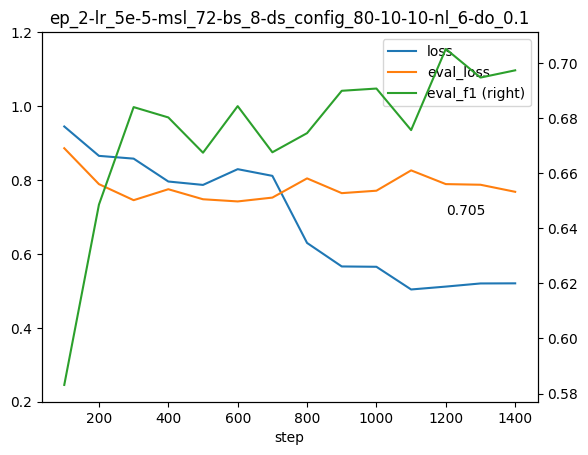

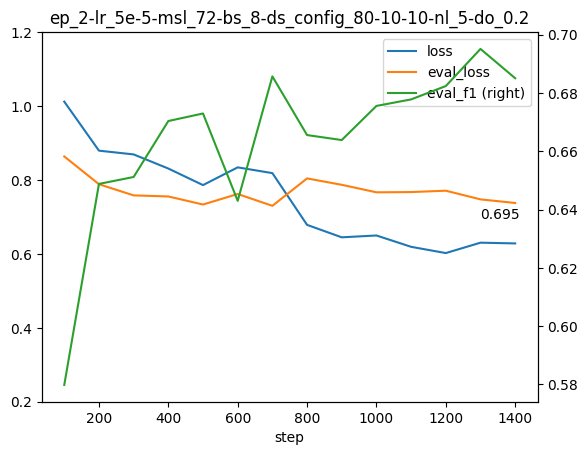

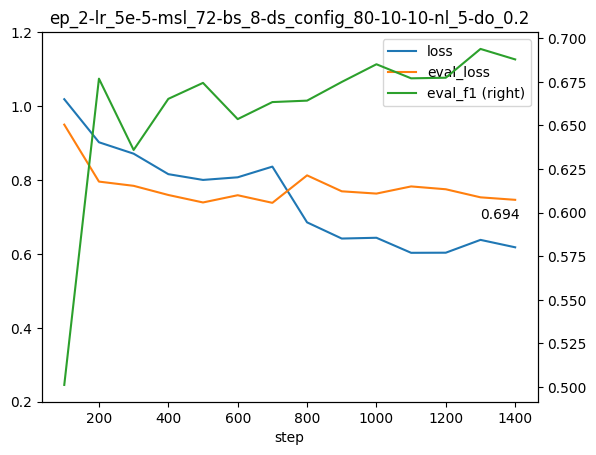

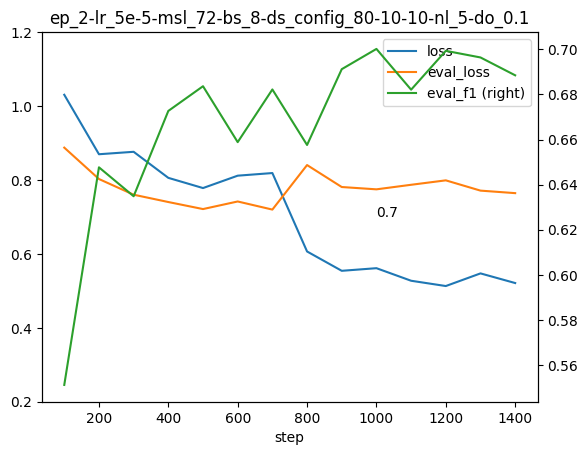

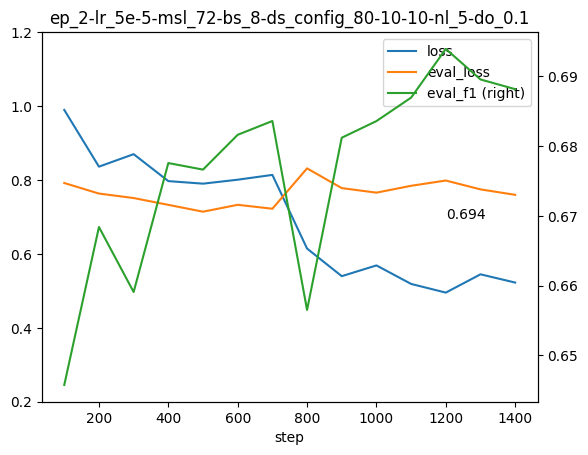

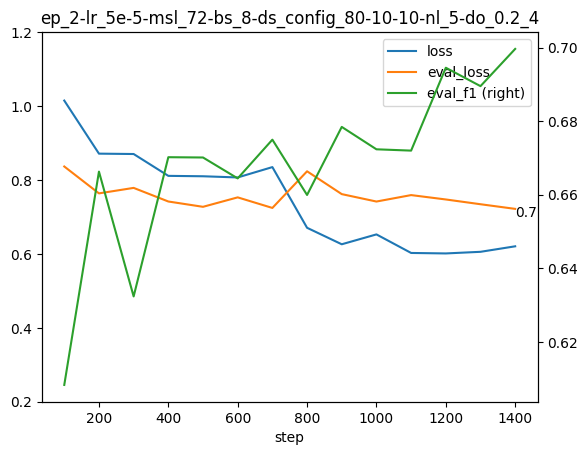

In [8]:
for tfile in trainer_output_files:
    with open(tfile) as f:
        trainer_json = json.load(f)
    log_hist = trainer_json['log_history']

    # Merge the two dicts that contain the losses per checkpoint in the log_history
    merged_hist = []
    for i in range(0, len(log_hist), 2):
        log_hist[i].update(log_hist[i+1])
        merged_hist.append(log_hist[i])

    df = pd.DataFrame.from_records(merged_hist)
    # Create an axes object    
    axes = plt.gca()
    # pass the axes object to plot function
    df.plot(title=tfile.split("/")[-3], kind='line', x='step', y=['loss', 'eval_loss'], ylim=(0.2,1.2), ax=axes)
    df.plot(title=tfile.split("/")[-3], kind='line', x='step', y='eval_f1', secondary_y = True, ax=axes)
    # Add the best F1 to the plot
    max_f1 = df['eval_f1'].max()
    index_f1 = df[df.eval_f1 == max_f1].index.values[0]
    step = int(df.iloc[index_f1]['step'])
    axes.annotate(f"{max_f1:.3}", xy=(step, max_f1))
    plt.show(block=True)
    
